# Summer Precip

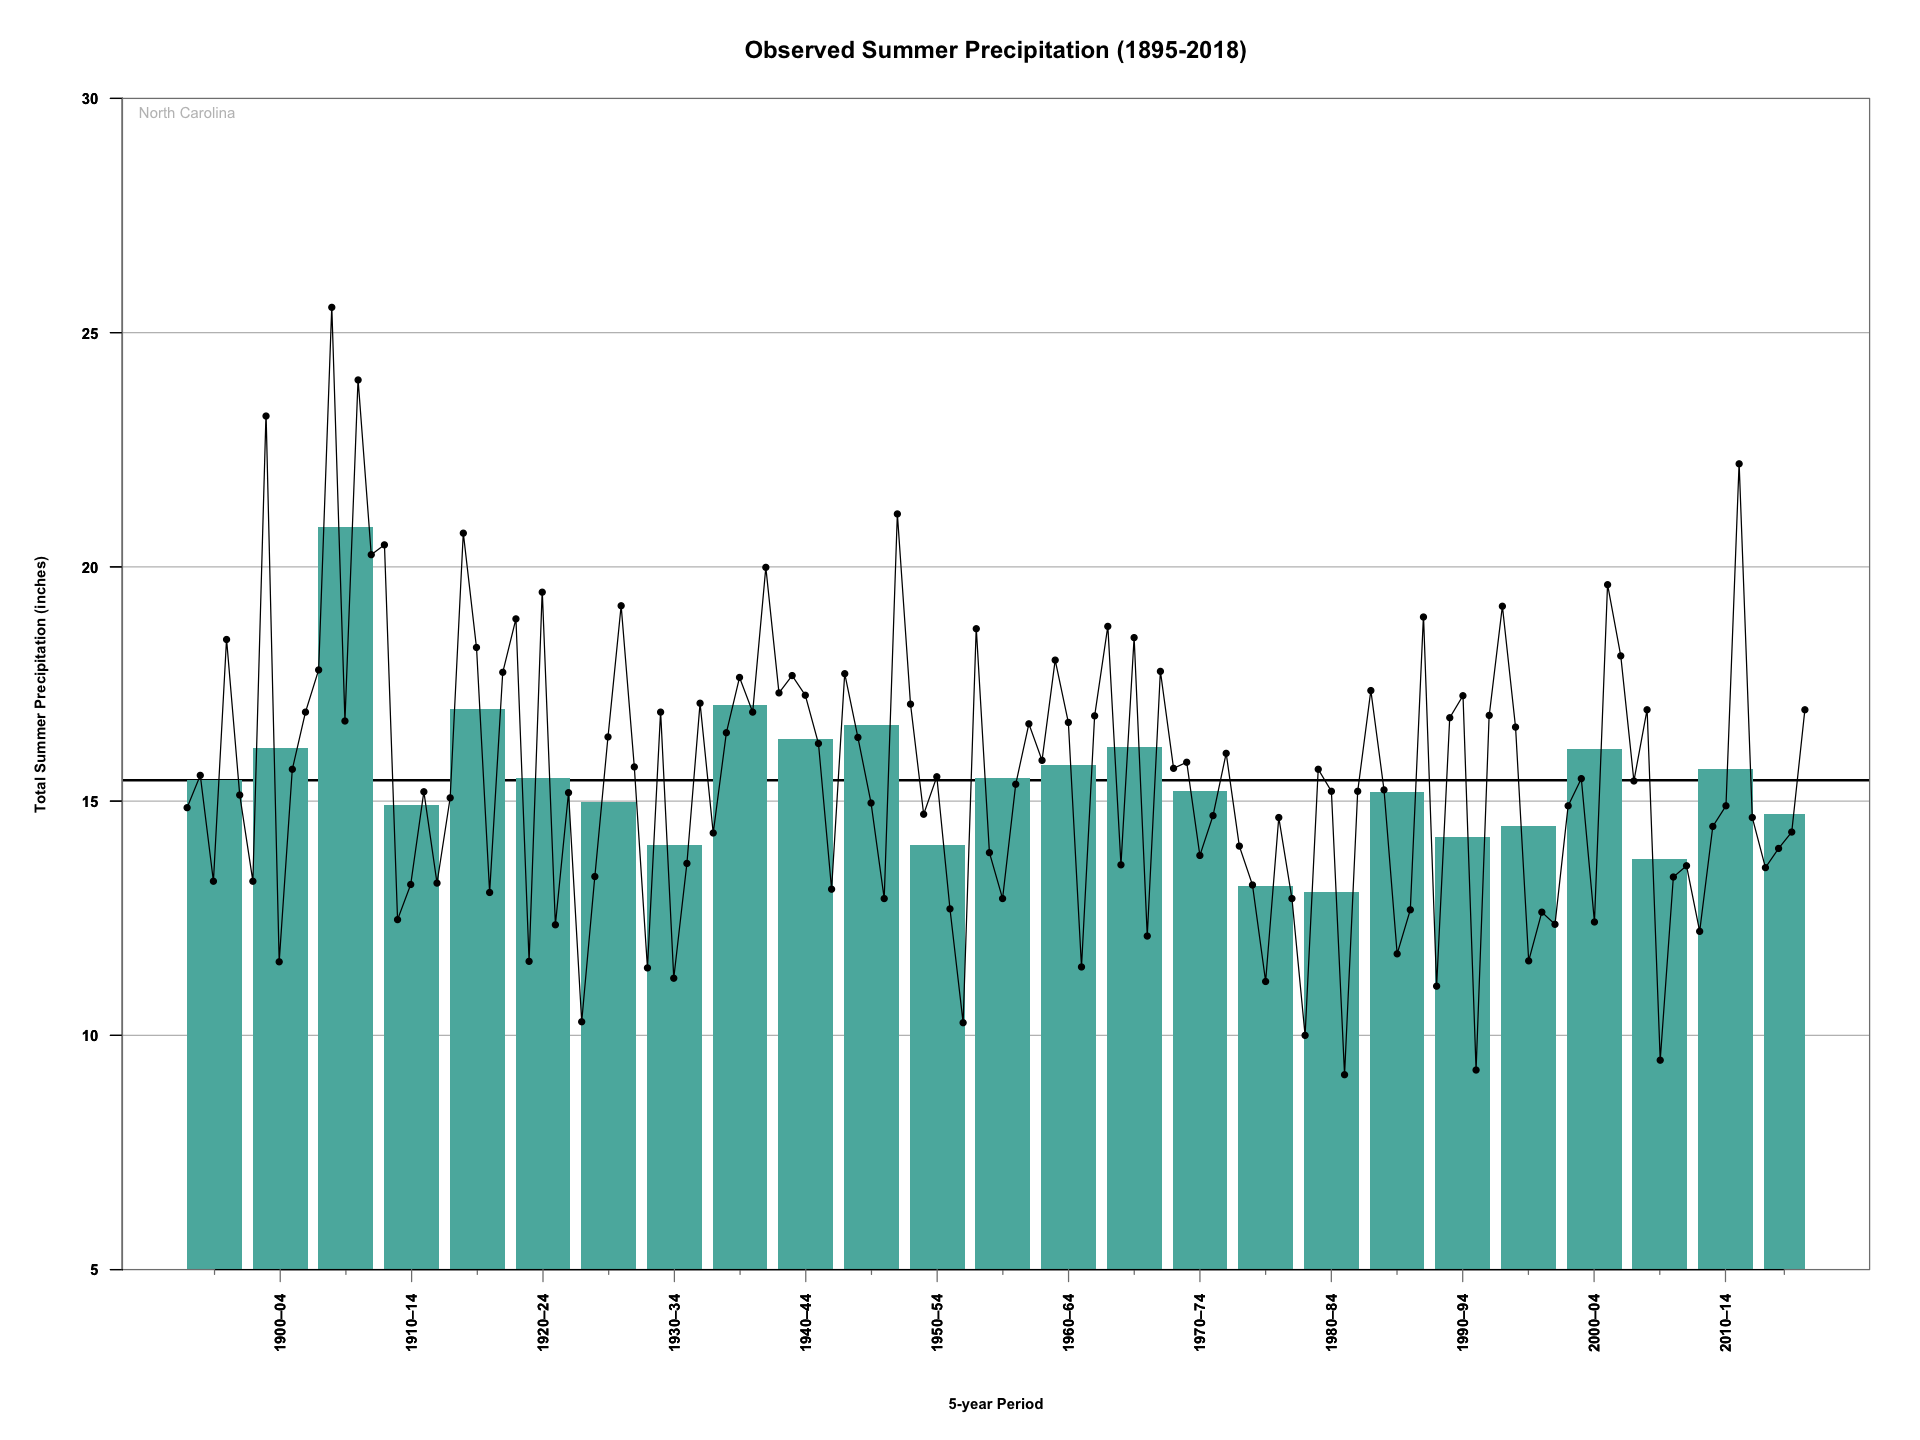

In [1]:
#
#	SUMMER PRCP
#
library(graphics)
library(IRdisplay)
options(warn=-1)
options(repr.plot.width = 16, repr.plot.height = 12)

#
# import monthly prcp file while keeping the leading zeros
#
prcpfull <- read.table("https://ncics.org/tsu-data/state-summaries/2018/nc/climdiv-pcpnst-v1.0.0-20190204.txt", header=FALSE, colClasses=c("character","numeric","numeric","numeric","numeric","numeric","numeric","numeric","numeric","numeric","numeric","numeric","numeric"), na.strings=c("-99.99"))
colnames(prcpfull) <- c("ID_state_year", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")

#
# splitting year and state ID from first column
#
#as.data.frame.matrix(prcpfull)
prcpfull$ID_state <- substr(prcpfull$ID_state_year, 1, 3)
prcpfull$year <- substr(prcpfull$ID_state_year, 7, 10)
prcpfull$year <- as.numeric(prcpfull$year)

#
# if the file contains a partial year of data, remove that data below (i.e. for plotting data through December 2016, the 2017 data was removed)
#
prcp <- subset(prcpfull, year<2019)

#
# create the new December column
#
Decwint=c(NA, head(prcp$December,-1))
prcp <- cbind(prcp, Decwint)

#
# calculate the yearly and seasonal prcp for the dataset
#
prcp$yrave <- rowSums(prcp [2:13])
prcp$winter <- with(prcp, Decwint+January+February, na.rm=FALSE)
prcp$spring <- with(prcp, March+April+May)
prcp$summer <- with(prcp, June+July+August)
prcp$fall <- with(prcp, September+October+November)

#
# creating NC subset
#
NC <- prcp[prcp$ID_state == "031", ]

#
# defining the reference group
#
NCref <- subset(NC, year>1900 & year<1961)

#
# summer analysis 
#
# calculate average for all NC
#
NCsummeravefull <- mean(NC$summer, na.rm=T)
#create the five year means for each five year period
f1 <- function(NC, n, type=1) {
	if (type == 1) {
		L1 <- nrow(NC) %/% n
		NC$grp <- c(rep(seq(L1), each=n), rep(tail(seq(L1), 1), nrow(NC)-n*L1))
		return(aggregate(summer~grp, NC, mean))
	} 
	else if (type == 2) {
		L1 <- nrow(NC) %/% n
		NC$grp <- c(rep(seq(L1), each=n), rep(tail(L1, 1)+1, nrow(NC)-n*L1))
		return(aggregate(summer~grp, NC, mean))
	}
}

#
# OPTION 2: use the function below if you want the extra years as a separate column 
#
NCgrpave <- f1(NC, 5, type=2)
NC5yrsummer <- NCgrpave$summer

NCfit.summer <- lm(summer~year, data=NC)


#
#	SUMMER PRCP GRAPHIC
#
#png("img/NCsummerprcpavefull2018.png", width=8,height=6,units="in",res=600)

#
# adjust the dates below to label the columns with the years; if no label is needed for a column use two quotation marks with no space between ("")
#
dates <- c("", "1900–04", "", "1910–14", "", "1920–24", "", "1930–34", "", "1940–44", "", "1950–54", "", "1960–64", "", "1970–74", "", "1980–84", "", "1990–94", "", "2000–04", "", "2010–14", "")
df <- data.frame(dates, NC5yrsummer)
par(mar = c(7,5,4,2) + 0.1)

#
# adjust the width below to match the requested length for each of the columns (0.4=3 years; 0.6=4 years; 0.8=5 years; 1.0=6 years; 1.2=7 years); when going from one column to two, be sure that both widths are included in the code
#
NCsummerprcpgraph <- barplot (df$NC5yrsummer, df$NC5yrsummer[1:24], width=c(0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6), space=c(0.2), legend=FALSE, main="Observed Summer Precipitation (1895-2018)", names.arg=df$dates, col=("#5AB4AC"), las=2, font=2, font.lab=2, ylim=range(pretty(NC$summer)), xpd=FALSE, border=NA, cex.lab=9/12, cex.axis=9/12, cex.names=9/12)
mtext(side=3, text="North Carolina", line=-1, cex=9/12, adj=0.01, col="#BFBFBF")
mtext(side=1, text="5-year Period", line=5, font=2, cex=9/12)
mtext(side=2, text="Total Summer Precipitation (inches)", line=3, font=2, cex=9/12)
abline(h=NCsummeravefull, lwd=2)
grid(ny=NULL, nx=FALSE, col="#BFBFBF", lty=1)
#adjust the width below to match the requested length for each of the columns (0.4=3 years; 0.6=4 years; 0.8=5 years; 1.0=6 years; 1.2=7 years); when going from one column to two, be sure that both widths are included in the code
barplot (df$NC5yrsummer, df$NC5yrsummer[1:24], width=c(0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6), space=c(0.2), legend=FALSE, main="Observed Summer Precipitation (1895-2018)", names.arg=df$dates, col=("#5AB4AC"), las=2, font=2, font.lab=2, ylim=range(pretty(NC$summer)), xpd=FALSE, add=TRUE, border=NA, cex.lab=9/12, cex.axis=9/12, cex.names=9/12)
box(col="#808080")
at <- c(NCsummerprcpgraph)
at1 <- at[c(TRUE, FALSE)]
at2 <- at[c(FALSE, TRUE)]
axis(side=1, at=at1, labels=FALSE, tcl=-0.2, col.ticks="#808080")
axis(side=1, at=at2, labels=FALSE, tcl=-0.5, col.ticks="#808080")
par(new=TRUE)

#
# the below code plots the individual year data on the graph; when an additional year is added, add another value (in increments of 0.2) to the sequence below. for example, when 2018 data is added, add 25.2; for 2019, 25.4 would be added
#
plotlocations <- c(0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6, 9.8, 10, 10.2, 10.4, 10.6, 10.8, 11, 11.2, 11.4, 11.6, 11.8, 12, 12.2, 12.4, 12.6, 12.8, 13, 13.2, 13.4, 13.6, 13.8, 14, 14.2, 14.4, 14.6, 14.8, 15, 15.2, 15.4, 15.6, 15.8, 16, 16.2, 16.4, 16.6, 16.8, 17, 17.2, 17.4, 17.6, 17.8, 18, 18.2, 18.4, 18.6, 18.8, 19, 19.2, 19.4, 19.6, 19.8, 20, 20.2, 20.4, 20.6, 20.8, 21, 21.2, 21.4, 21.6, 21.8, 22, 22.2, 22.4, 22.6, 22.8, 23, 23.2, 23.4, 23.6, 23.8, 24, 24.2, 24.4, 24.6, 24.8, 25.0, 25.2)
plot(NC$year, NC$summer, type="o", col="black", pch=20, ylim=range(pretty(NC$summer)), yaxs="i", axes=FALSE, ylab="", xlab="")
axis(side=1, at=plotlocations)
